#                         🎞🎬📽🎥           👓🧐👀

# Análisis exploratorio de datos del dataset movies

### Se importan las librerias a utilizar

In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Se estandariza la forma de mostrar los graficos

In [2]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (10, 5)

### Se carga el csv y se crea el dataframe a utilizar

In [3]:
movies = pd.read_csv('/work/movies_with_credits.csv') 

### Vista preliminar del dataset

In [4]:
movies

,budget,genres,id,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,cast,return,release_year,director
0,30000000.0,"['Animation', 'Comedy', 'Family']",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,NaN,Toy Story,7.7,5415.0,"{'Woody (voice)': 'Tom Hanks', 'Buzz Lightyear...",12.451801,1995,John Lasseter
1,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"{'Alan Parrish': 'Robin Williams', 'Samuel Ala...",4.043035,1995,Joe Johnston
2,0.0,"['Romance', 'Comedy']",15602,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"{'Max Goldman': 'Walter Matthau', 'John Gustaf...",0.000000,1995,Howard Deutch
3,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"{""Savannah 'Vannah' Jackson"": 'Whitney Houston...",5.090760,1995,Forest Whitaker
4,0.0,['Comedy'],11862,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"{'George Banks': 'Steve Martin', 'Nina Banks':...",0.000000,1995,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45340,0.0,"['Drama', 'Action', 'Romance']",30840,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,NaN,Robin Hood,5.7,26.0,"{'Sir Robert Hode': 'Patrick Bergin', 'Maid Ma...",0.000000,1991,John Irvin
45341,0.0,['Drama'],111109,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,NaN,Century of Birthing,9.0,3.0,"{'Sister Angela': 'Angel Aquino', 'Homer': 'Pe...",0.000000,2011,Lav Diaz
45342,0.0,"['Action', 'Drama', 'Thriller']",67758,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,A deadly game of wits.,Betrayal,3.8,6.0,"{'Emily Shaw': 'Erika Eleniak', 'Det. Mark Win...",0.000000,2003,Mark L. Lester
45343,0.0,[],227506,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,NaN,Satan Triumphant,0.0,0.0,{'': 'Vera Orlova'},0.000000,1917,Yakov Protazanov


### A continuacion se detalla el glosario de datos del dataset

- adult: Indica si la película tiene calificación X, exclusiva para adultos.                                                                                                                               -

- belongs_to_collection:	Un diccionario que indica a que franquicia o serie de películas pertenece la película

- budget	: El presupuesto de la película, en dólares

- genres: Un diccionario que indica todos los géneros asociados a la película

- homepage: La página web oficial de la película

- id: ID de la película

- imdb_id: IMDB ID de la película

- original_language: Idioma original en la que se grabo la película

- original_title: Titulo original de la película

- overview: Pequeño resumen de la película

- popularity: Puntaje de popularidad de la película, asignado por TMDB (TheMoviesDataBase)

- poster_path: URL del póster de la película

- production_companies: Lista con las compañías productoras asociadas a la película

- production_countries: Lista con los países donde se produjo la película

- release_date: Fecha de estreno de la película

- revenue: Recaudación de la película, en dolares

- runtime: Duración de la película, en minutos

- spoken_languages: Lista con los idiomas que se hablan en la película

- status: Estado de la película actual (si fue anunciada, si ya se estreno, etc)

- tagline: Frase celebre asociada la película

- title: Titulo de la película

- video: Indica si hay o no un tráiler en video disponible en TMDB

- vote_average:	Puntaje promedio de reseñas de la película

- vote_count: Numeros de votos recibidos por la película, en TMDB

### Alguna de las características anteriores fueron eliminadas durante el proceso de ETL ya que no aportaban información importante para este analisis

### Se verifica el tipo de datos del dataframe

In [5]:
movies.dtypes

budget          float64
genres           object
id                int64
overview         object
popularity      float64
release_date     object
revenue         float64
runtime         float64
tagline          object
title            object
vote_average    float64
vote_count      float64
cast             object
return          float64
release_year      int64
director         object
dtype: object

### Se verifica la cantidad de filas y columnas del dataframe

In [6]:
movies.shape

(45345, 16)

### Se realiza un mapa de calor para verificar si hay valores nulos, y si es así, donde están ubicados

<Axes: >

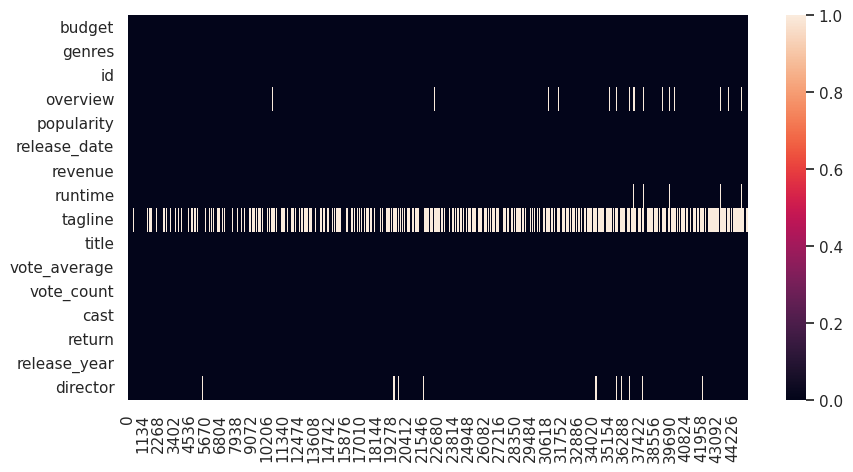

In [7]:
movies.isnull().transpose().pipe(
    lambda df:(
        sns.heatmap(
            data=df
        )
    )
)

### Como se ve en el grafico tenemos varios valores nulos en la columna de la frase celebre asociada a la película, también hay algunos nulos en el resumen y en los directores

### Se verifican las medidas de tendencia central y dispersión de las columnas numéricas

In [8]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,return,release_year
count,4.534500e+04,45345.000000,45345.000000,4.534500e+04,45099.000000,45345.000000,45345.000000,4.534500e+04,45345.000000
mean,4.232673e+06,108035.740479,2.926248,1.123390e+07,94.179893,5.624320,110.137722,6.604937e+02,1991.882280
std,1.744391e+07,112180.079341,6.011023,6.441058e+07,38.346636,1.915178,491.904428,7.471882e+04,24.053016
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,26390.000000,0.388826,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00,1978.000000
50%,0.000000e+00,59852.000000,1.130269,0.000000e+00,95.000000,6.000000,10.000000,0.000000e+00,2001.000000
75%,0.000000e+00,156597.000000,3.689610,0.000000e+00,107.000000,6.800000,34.000000,0.000000e+00,2010.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,1.239638e+07,2020.000000


### Se verifican datos estadisticos de las columnas no numericas

In [9]:
movies.describe(include='object')

,genres,overview,release_date,tagline,title,cast,director
count,45345,44404,45345,20387,45345,45345,44510
unique,4065,44231,17333,20269,42195,42731,17980
top,['Drama'],No overview found.,2008-01-01,Based on a true story.,Cinderella,{},John Ford
freq,4994,133,136,7,11,2348,65


### Se convierte los valores de la columna genero a tipo de dato lista

In [10]:
def convertir_a_lista(fila):
    try:
        return ast.literal_eval(fila)
    except (SyntaxError, ValueError):
        return []


movies['genres'] = movies['genres'].apply(convertir_a_lista)


### Se convierte la columna director a categorica

In [11]:
movies.astype({'director': 'category'})

,budget,genres,id,overview,popularity,release_date,revenue,runtime,tagline,title,vote_average,vote_count,cast,return,release_year,director
0,30000000.0,"[Animation, Comedy, Family]",862,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,NaN,Toy Story,7.7,5415.0,"{'Woody (voice)': 'Tom Hanks', 'Buzz Lightyear...",12.451801,1995,John Lasseter
1,65000000.0,"[Adventure, Fantasy, Family]",8844,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"{'Alan Parrish': 'Robin Williams', 'Samuel Ala...",4.043035,1995,Joe Johnston
2,0.0,"[Romance, Comedy]",15602,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"{'Max Goldman': 'Walter Matthau', 'John Gustaf...",0.000000,1995,Howard Deutch
3,16000000.0,"[Comedy, Drama, Romance]",31357,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"{""Savannah 'Vannah' Jackson"": 'Whitney Houston...",5.090760,1995,Forest Whitaker
4,0.0,[Comedy],11862,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"{'George Banks': 'Steve Martin', 'Nina Banks':...",0.000000,1995,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45340,0.0,"[Drama, Action, Romance]",30840,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0.0,104.0,NaN,Robin Hood,5.7,26.0,"{'Sir Robert Hode': 'Patrick Bergin', 'Maid Ma...",0.000000,1991,John Irvin
45341,0.0,[Drama],111109,An artist struggles to finish his work while a...,0.178241,2011-11-17,0.0,360.0,NaN,Century of Birthing,9.0,3.0,"{'Sister Angela': 'Angel Aquino', 'Homer': 'Pe...",0.000000,2011,Lav Diaz
45342,0.0,"[Action, Drama, Thriller]",67758,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0.0,90.0,A deadly game of wits.,Betrayal,3.8,6.0,"{'Emily Shaw': 'Erika Eleniak', 'Det. Mark Win...",0.000000,2003,Mark L. Lester
45343,0.0,[],227506,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0.0,87.0,NaN,Satan Triumphant,0.0,0.0,{'': 'Vera Orlova'},0.000000,1917,Yakov Protazanov


### Se cuentas los valores de la columna director

In [12]:
movies['director'].value_counts()

director
John Ford            65
Michael Curtiz       61
Alfred Hitchcock     52
Werner Herzog        52
Georges Méliès       51
                     ..
David Andalman        1
Derek Cole            1
Rob Kuhns             1
D. Channsin Berry     1
Daisy Asquith         1
Name: count, Length: 17980, dtype: int64

### Se grafican los directores con mayor cantidad de películas dirigidas

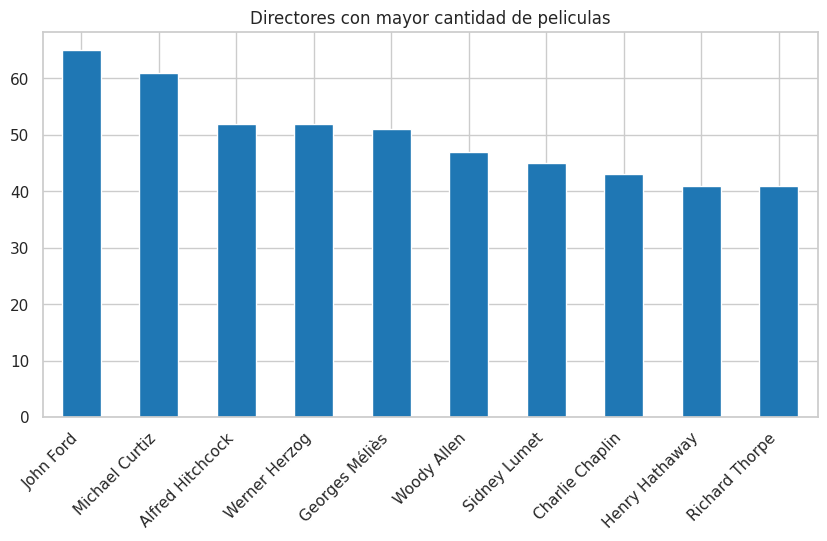

In [13]:
movies.director.value_counts().head(10).plot(kind='bar', xlabel='', title='Directores con mayor cantidad de peliculas')
plt.xticks(rotation=45, ha='right')
plt.show()

### Se grafica la cantidad de películas pertenecientes a cada genero

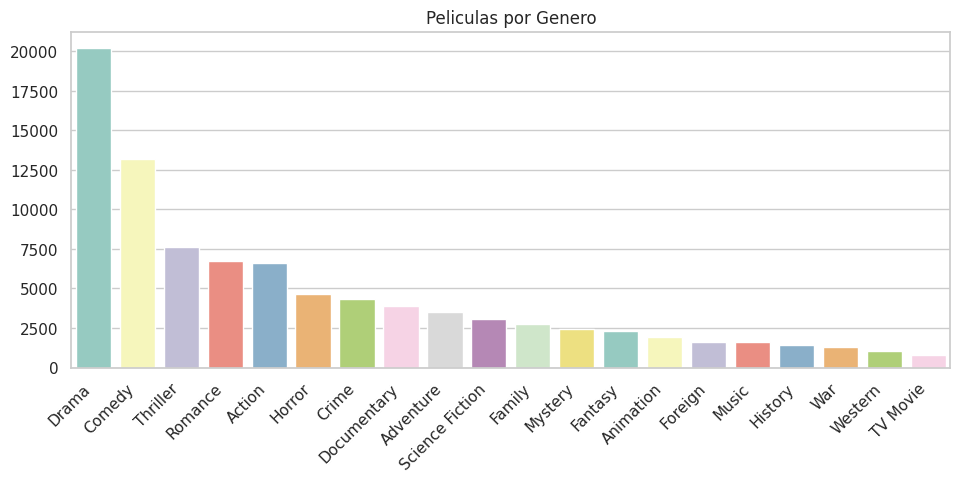

In [14]:
movies_ex = movies['genres'].explode()
sns.barplot(x=movies_ex.value_counts().index, y=movies_ex.value_counts(), palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Peliculas por Genero')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Se coloca a los protagonistas dentro de una lista

In [15]:
for i, item in enumerate(movies['cast']):
    item_dict = ast.literal_eval(item)
    values_list = list(item_dict.values())
    movies.at[i, 'cast'] = values_list

### Se grafica el actor/actriz que participo en mayor cantidad de peliculas

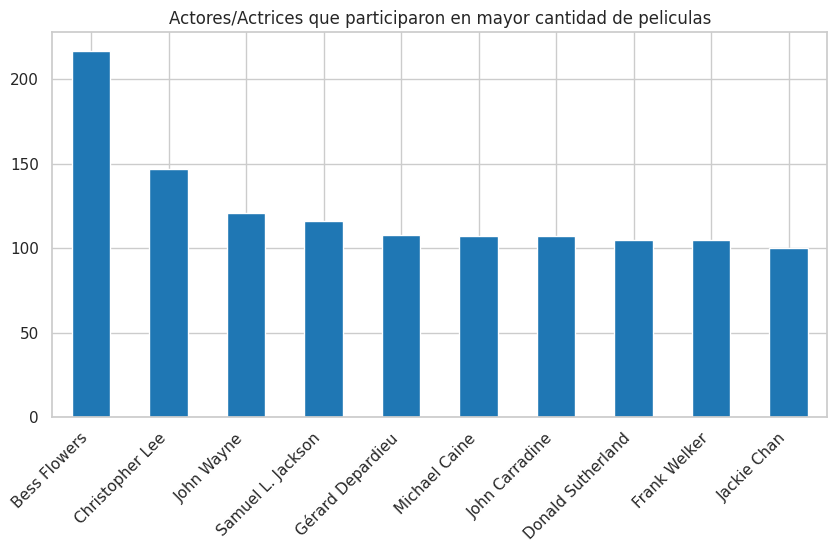

In [16]:
plt.title('Actores/Actrices que participaron en mayor cantidad de peliculas')
movies['cast'].explode().value_counts().head(10).plot(kind='bar', xlabel='')
plt.xticks(rotation=45, ha='right')
plt.show()

### Se grafica una nube palabras del titulo

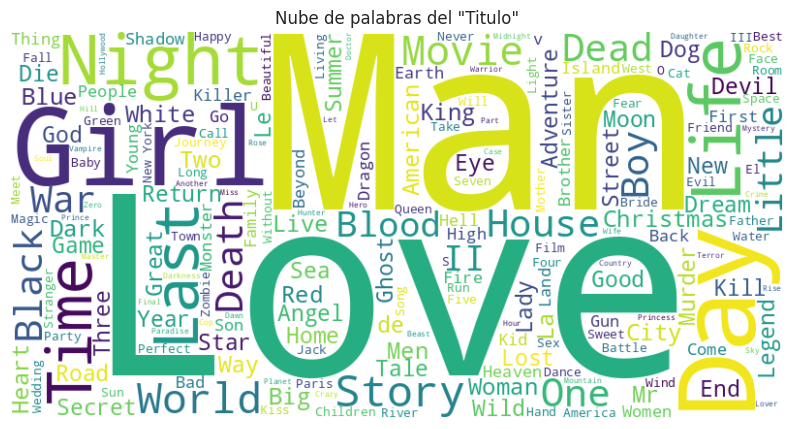

In [18]:
titulo = movies['title'].astype(str) 
titulo = ' '.join(titulo)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(titulo)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras del "Titulo"')
plt.show()

### Se grafica una nube de palabras del resumen

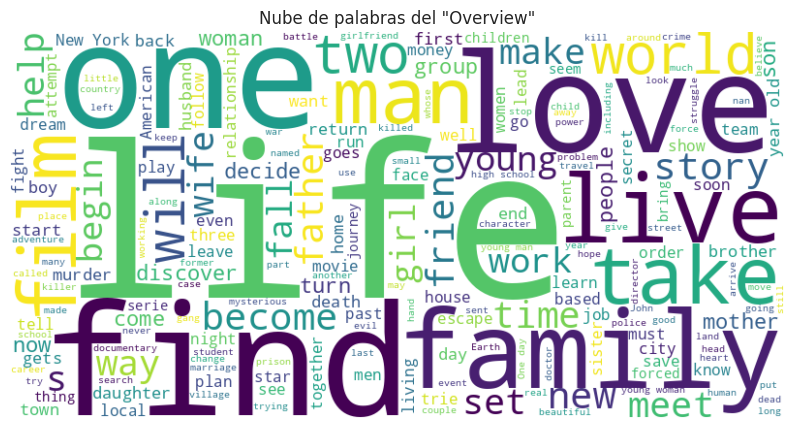

In [19]:
titulo = movies['overview'].astype(str) 
titulo = ' '.join(titulo)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(titulo)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de palabras del "Overview"')
plt.axis('off')
plt.show()

### Se grafica una nube de palabras de la frase celebre asociada

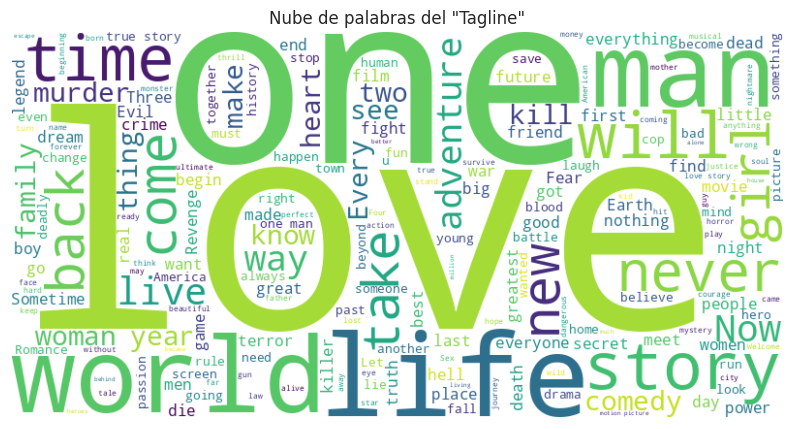

In [20]:
titulo = movies['tagline'].dropna().astype(str) 
titulo = ' '.join(titulo)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(titulo)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de palabras del "Tagline"')
plt.axis('off')
plt.show()

### Se convierten los datos de la columna fecha de lanzamiento a datetime

In [21]:
movies['release_date'] =pd.to_datetime(movies['release_date'], errors='coerce')

### Se crea una funcón para saber cuantas películas se estrenaron por cada dia de la semana

In [22]:
dias = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']

def cantidad_filmaciones_dia(dia:str):
    
    try:
        dia_numero = dias.index(dia.lower()) + 1
        filas_con_dias = movies[movies['release_date'].dt.dayofweek == dia_numero]
        cant_dias = len(filas_con_dias)
        return cant_dias
    except ValueError:
       return {'Error':'Ingrese el dia nuevamente, evite usar acentos. Ejemplo: lunes'}


resultados = []

for dia in dias:
    resultado = cantidad_filmaciones_dia(dia)
    resultados.append(resultado)

df_dias = pd.DataFrame({'dia' : dias, 'Cantidad': resultados})

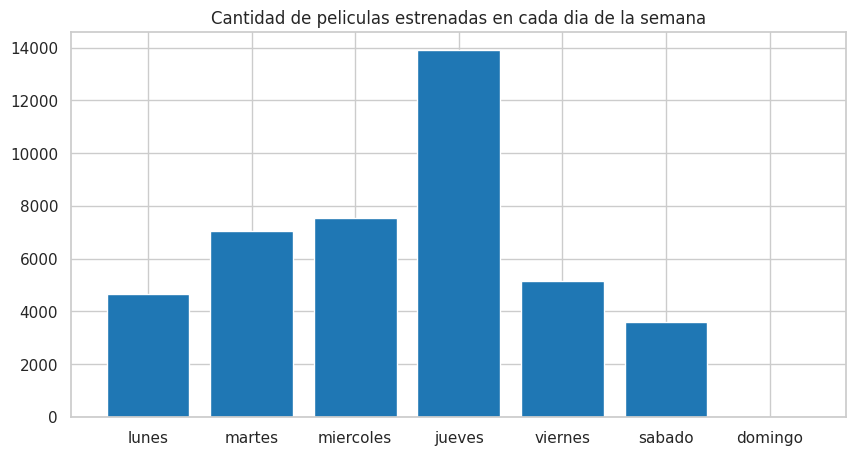

In [23]:
plt.bar(df_dias['dia'], df_dias['Cantidad'])
plt.xlabel('')
plt.ylabel('')
plt.title('Cantidad de peliculas estrenadas en cada dia de la semana')
plt.show()

### Se crea una funcion para saber cuantas peliculas se estrenaron por mes

In [24]:
meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']

def cantidad_filmaciones_mes(mes:str):
   

    mes_numero = meses.index(mes.lower()) + 1
    filas_con_mes = movies[movies['release_date'].dt.month == mes_numero]
    cant_meses = len(filas_con_mes)
    return cant_meses

resultados = []

for mes in meses:
    resultado = cantidad_filmaciones_mes(mes)
    resultados.append(resultado)

df_mes = pd.DataFrame({'mes' : meses, 'Cantidad': resultados})

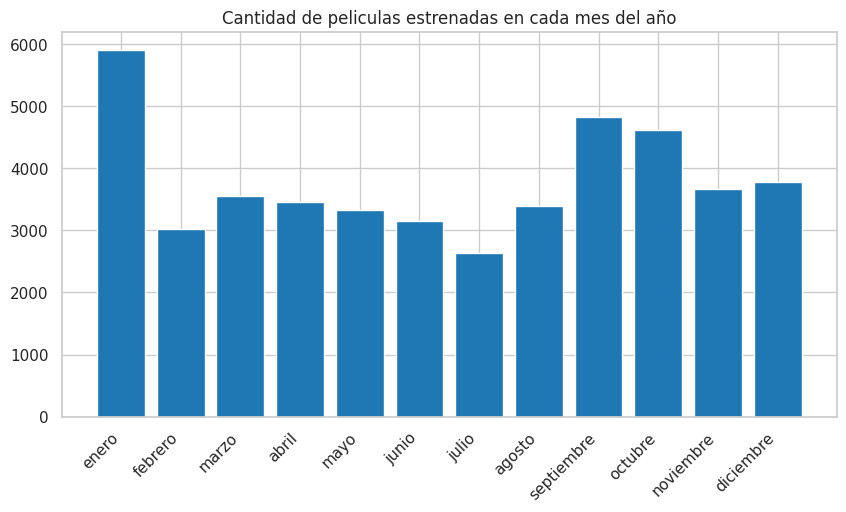

In [25]:
plt.bar(df_mes['mes'], df_mes['Cantidad'])
plt.xlabel('')
plt.ylabel('')
plt.title('Cantidad de peliculas estrenadas en cada mes del año')
plt.xticks(rotation=45, ha='right')
plt.show()

### Se hace un grafico de caja de la columna presupuesto

<Axes: xlabel='budget'>

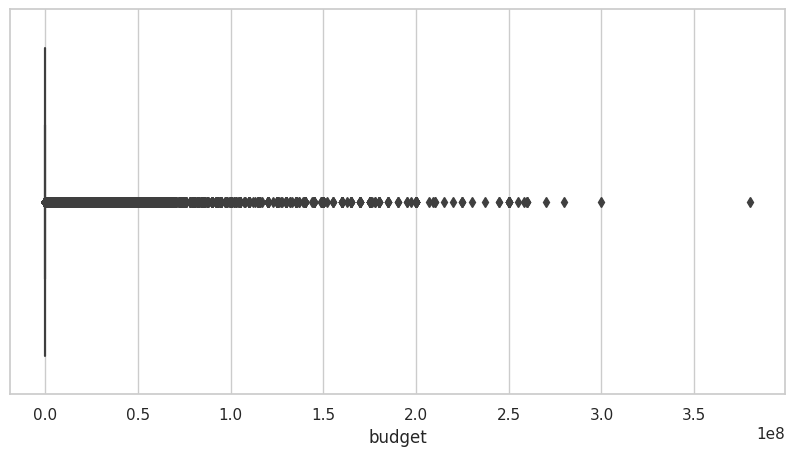

In [26]:
sns.boxplot(
    data=movies,
    x='budget'
)

### Se nota que se cuenta con muchos registros con valores muy cercanos a cero lo cual no es real, a continuación se grafica sin tenerlos en cuenta

<Axes: xlabel='budget'>

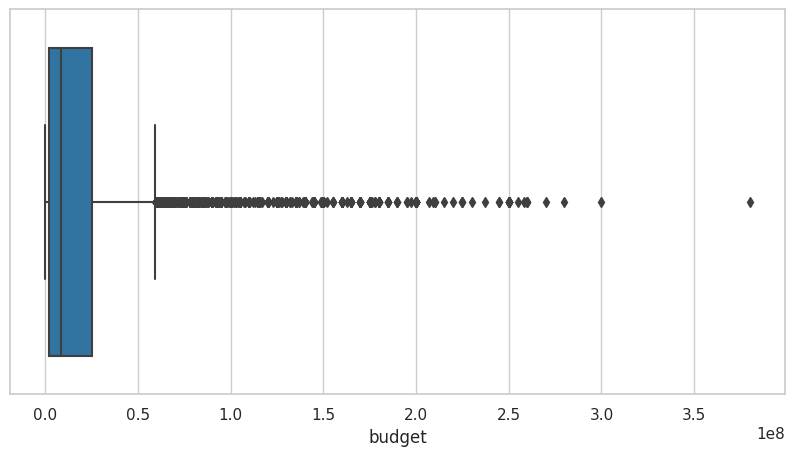

In [27]:
movies_bud = movies[movies['budget']>10]
sns.boxplot(
    data=movies_bud,
    x='budget'
)

### Se ordena la columna presupuesto para saber cuales películas contaron con los mayores

In [28]:
movies_pres = movies.sort_values('budget', ascending=False).head(10)

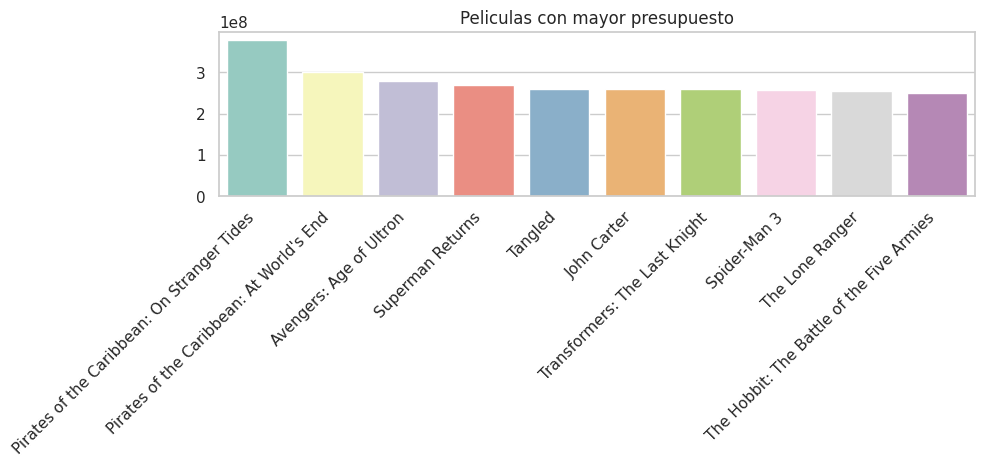

In [29]:
sns.barplot(x=movies_pres['title'], y=movies_pres['budget'], palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Peliculas con mayor presupuesto')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Se hace un grafico de caja de la columna recaudacion

<Axes: xlabel='revenue'>

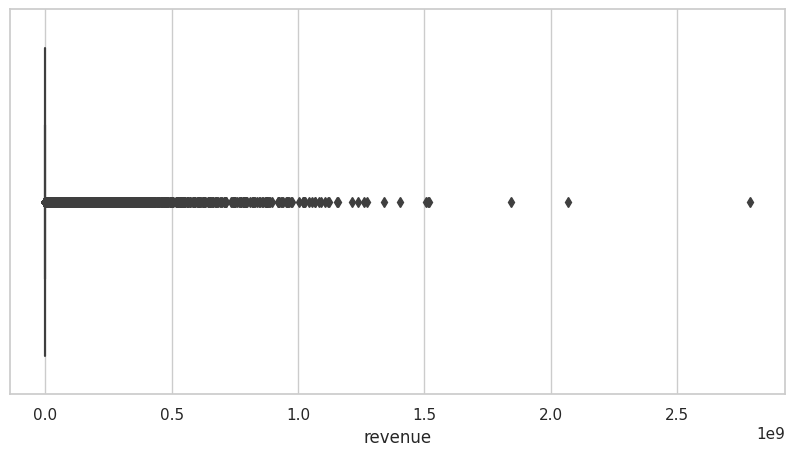

In [30]:
sns.boxplot(
    data=movies,
    x='revenue'
)

### Se nota que se cuenta con muchos registros con valores muy cercanos a cero lo cual no es real, a continuación se grafica sin tenerlos en cuenta

<Axes: xlabel='revenue'>

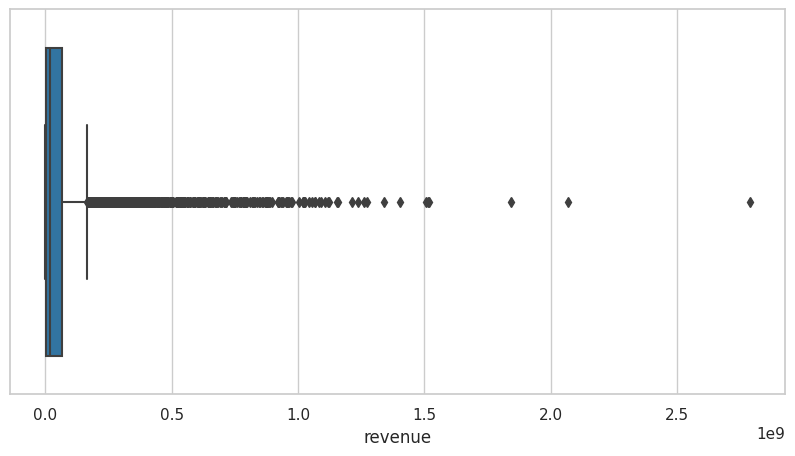

In [31]:
movies_rev = movies[movies['revenue']>10]
sns.boxplot(
    data=movies_rev,
    x='revenue'
)

### Se ordena la columna recaudación para saber que películas tuvieron las mayores

In [32]:
movies_rev = movies.sort_values('revenue', ascending=False).head(10)

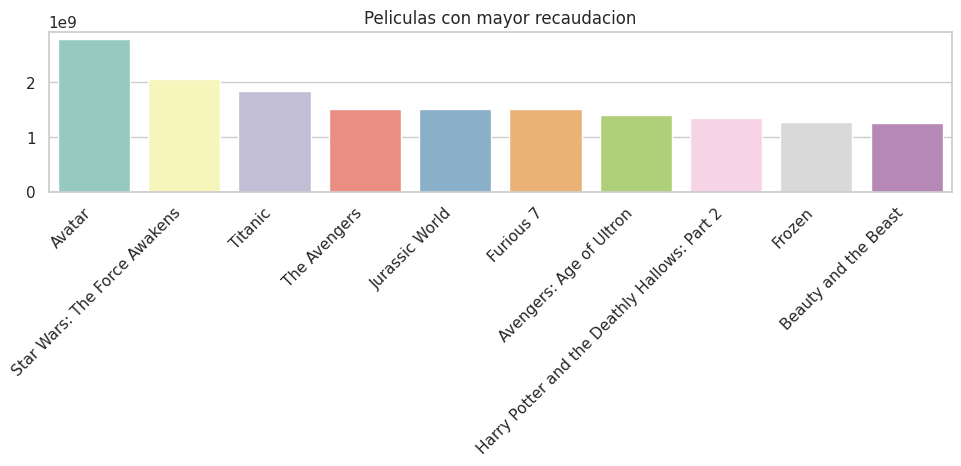

In [33]:
sns.barplot(x=movies_rev['title'], y=movies_rev['revenue'], palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Peliculas con mayor recaudacion')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Se hace un grafico de caja de la columna retorno

<Axes: xlabel='return'>

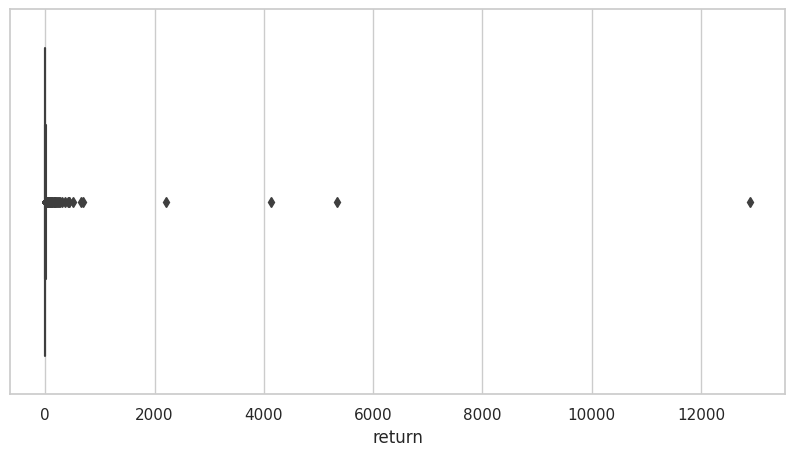

In [34]:
movies_ret = movies[movies['budget']>200]
sns.boxplot(
    data=movies_ret,
    x='return'
)

### Se ordena la columna retorno para saber cuales fueron las películas mas exitosas

In [35]:
movies_ret = movies_ret.sort_values('return', ascending=False).head(10)

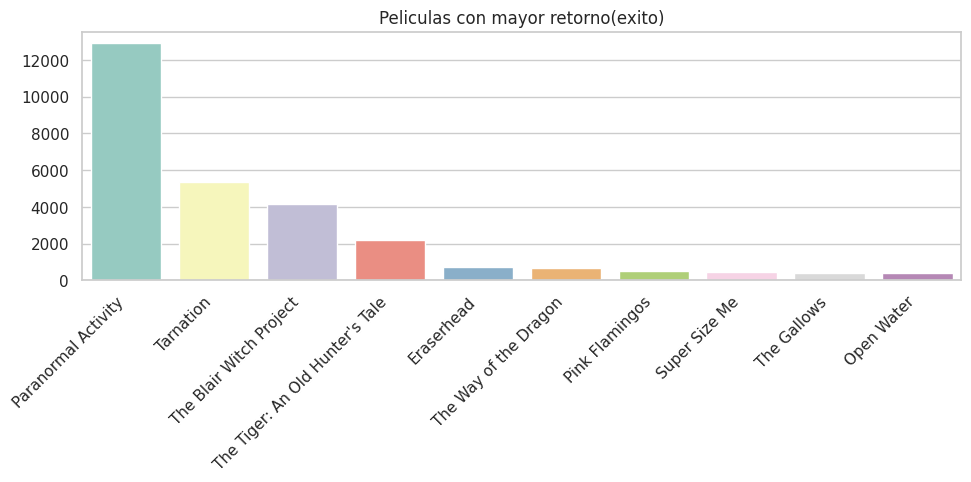

In [36]:
sns.barplot(x=movies_ret['title'], y=movies_ret['return'], palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Peliculas con mayor retorno(exito)')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Se hace un grafico de caja de la columna popularidad

<Axes: xlabel='popularity'>

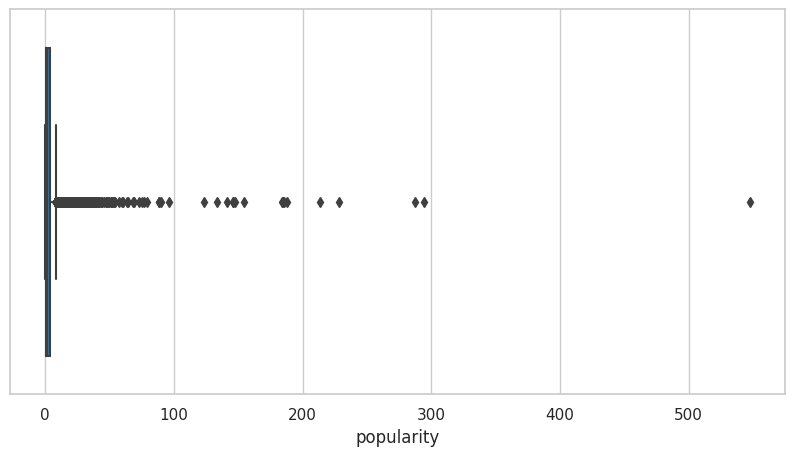

In [37]:
sns.boxplot(
    data=movies,
    x='popularity'
)

### Se ordena la columna popularidad para saber cuales fueron las películas mas populares

In [38]:
movies_pop = movies.sort_values('popularity', ascending=False).head(10)

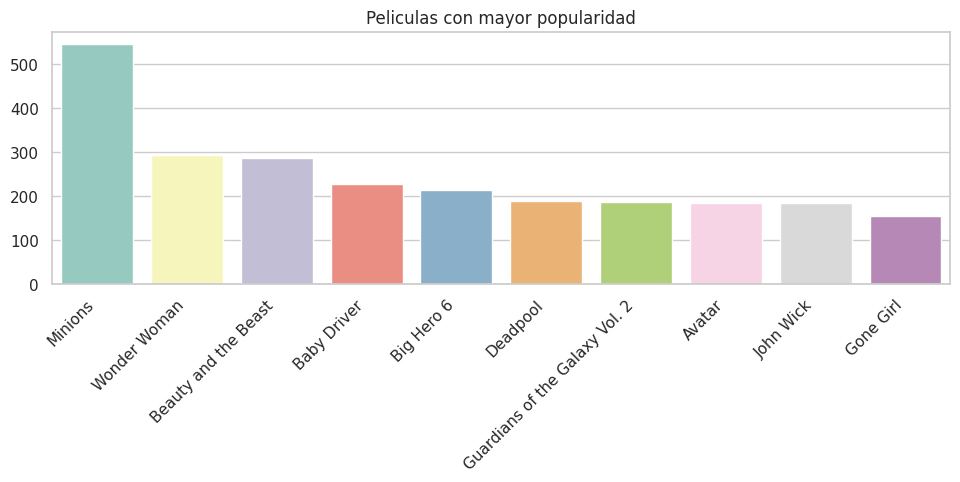

In [39]:
sns.barplot(x=movies_pop['title'], y=movies_pop['popularity'], palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Peliculas con mayor popularidad')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Se hace un grafico de caja de la columna puntaje promedio

<Axes: xlabel='vote_average'>

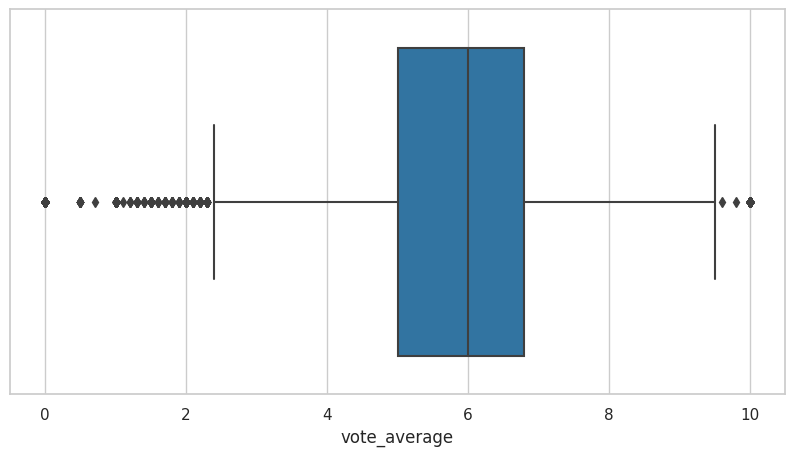

In [40]:
sns.boxplot(
    data=movies,
    x='vote_average'
)

### De la misma columna se grafica un histograma 

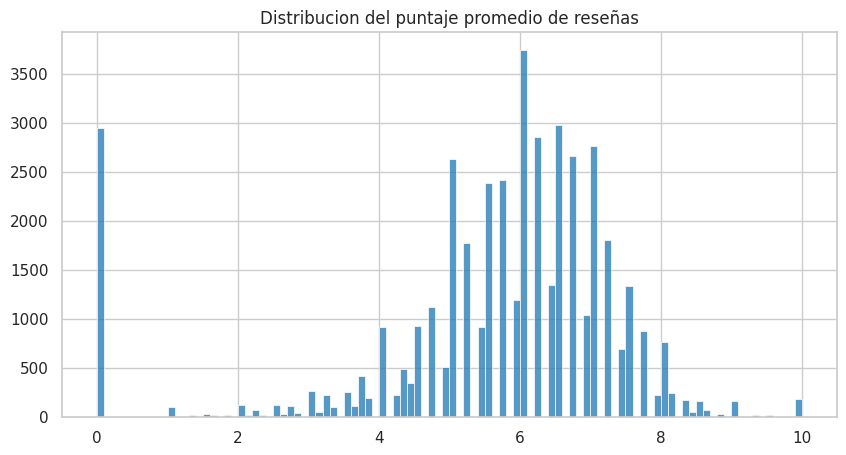

In [52]:
sns.histplot(data=movies,x='vote_average')
plt.xlabel('')
plt.ylabel('')
plt.title('Distribucion del puntaje promedio de reseñas')
plt.show()

### Se ordena la columna promedio de puntaje para saber cual de las películas mas populares tuvieron mayor puntaje promedio en sus reseñas

In [41]:
movies_ave = movies.sort_values('popularity', ascending=False).head(50)
movies_ave = movies_ave.sort_values('vote_average', ascending=False).head(10)

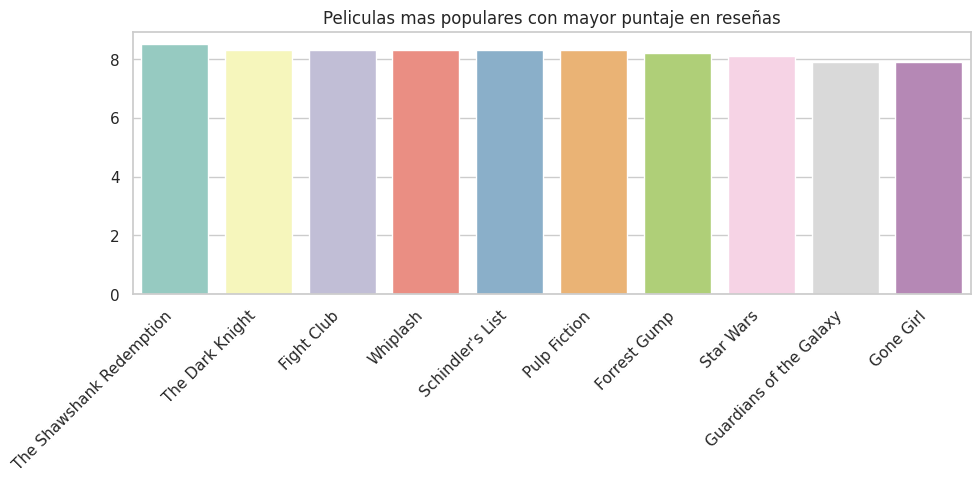

In [42]:
sns.barplot(x=movies_ave['title'], y=movies_ave['vote_average'], palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Peliculas mas populares con mayor puntaje en reseñas')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Se grafica la cantidad de películas que se estrenaron por año

<Axes: xlabel='release_date', ylabel='Density'>

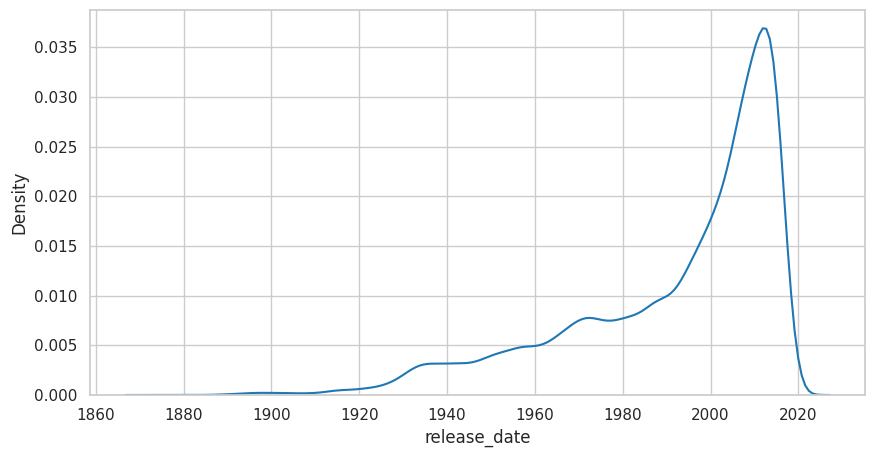

In [43]:
sns.kdeplot(
    data=movies,
    x=movies['release_date'].dt.year,
    bw_method=0.1
)

### Relación entre presupuesto y popularidad

<Axes: xlabel='budget', ylabel='popularity'>

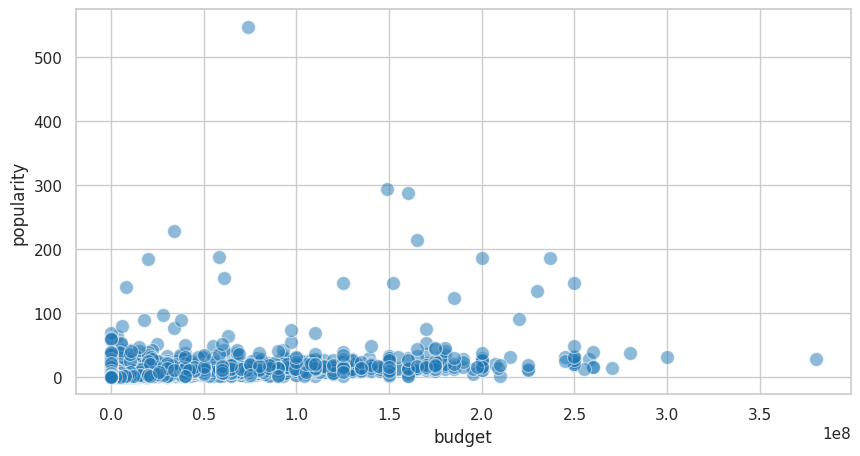

In [44]:
sns.scatterplot(
    data=movies,
    x='budget',
    y='popularity',
    alpha=0.5,
    s=100
)

### Relación entre recaudación y popularidad

<Axes: xlabel='revenue', ylabel='popularity'>

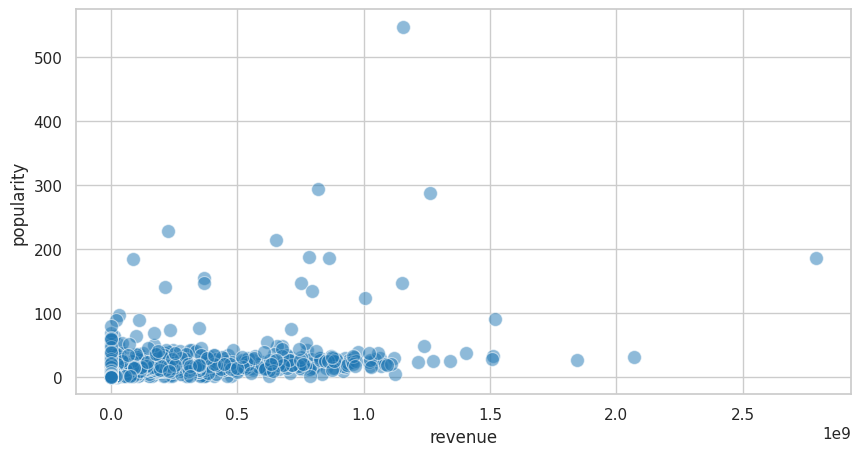

In [45]:
sns.scatterplot(
    data=movies,
    x='revenue',
    y='popularity',
    alpha=0.5,
    s=100
)

### Relacion entre presupuesto y recaudación, que vendría a hacer el éxito de la pelicula

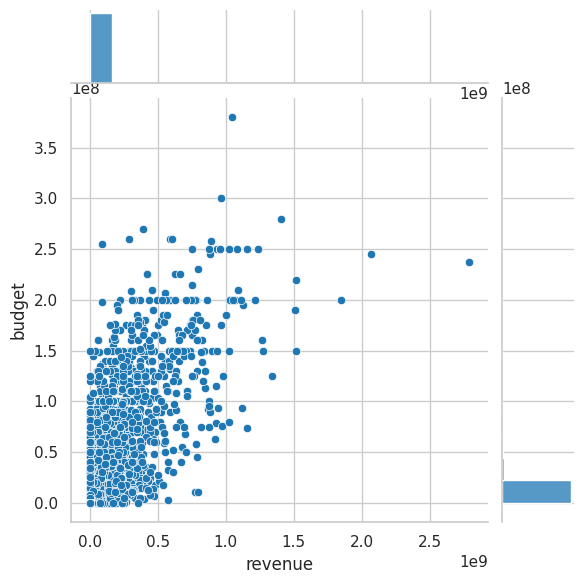

In [46]:
sns.jointplot(
    data=movies,
    x='revenue',
    y='budget'
)

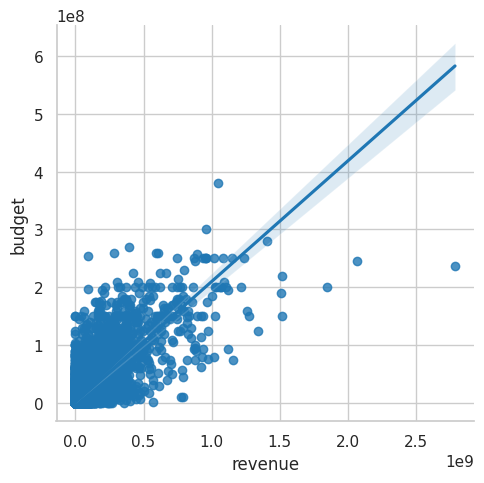

In [47]:
sns.lmplot(
    data=movies,
    x='revenue',
    y='budget'
)

### Relación entre popularidad y puntaje promedio de reseñas

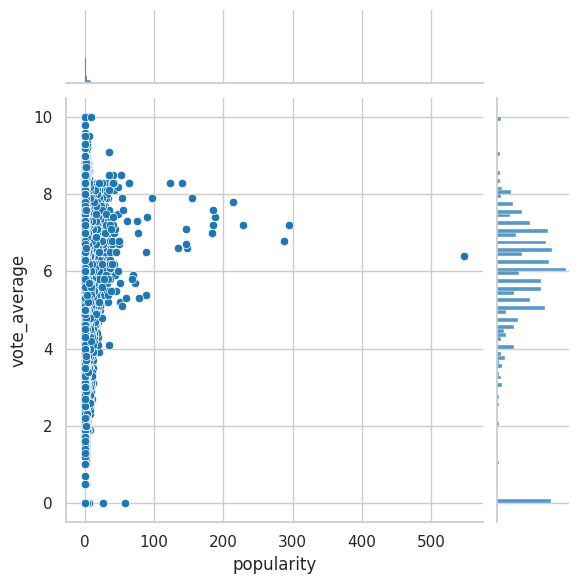

In [48]:
sns.jointplot(
    data=movies,
    x='popularity',
    y='vote_average'
)

### Se grafica un mapa de calor de las variables numericas

<Axes: >

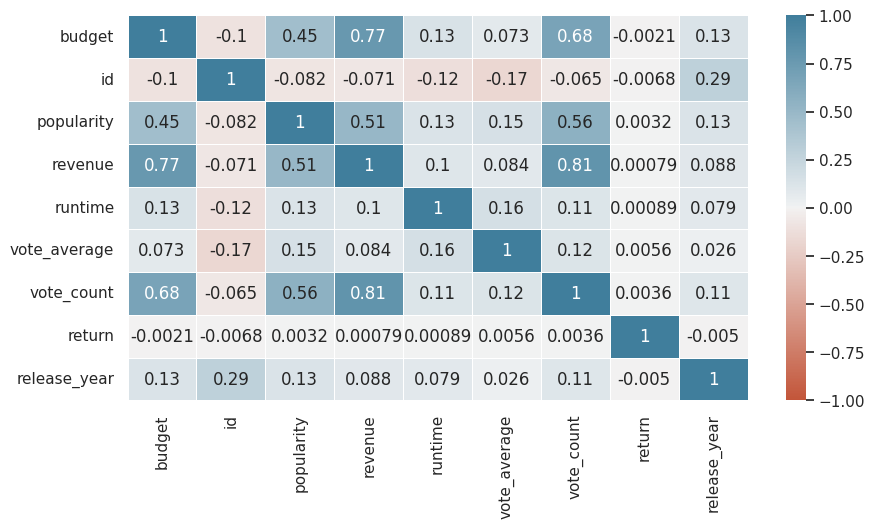

In [49]:
columnas_numericas = movies.select_dtypes(include='number')
sns.heatmap(
    data=columnas_numericas.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

### Las correlaciones mas altas se encuentran entre presupuesto y recaudación, también entre recaudación y la cantidad de votos recibidos TMDB (The movie database), lo mismo para presupuesto y cantidad de votos recibidos en TMDB

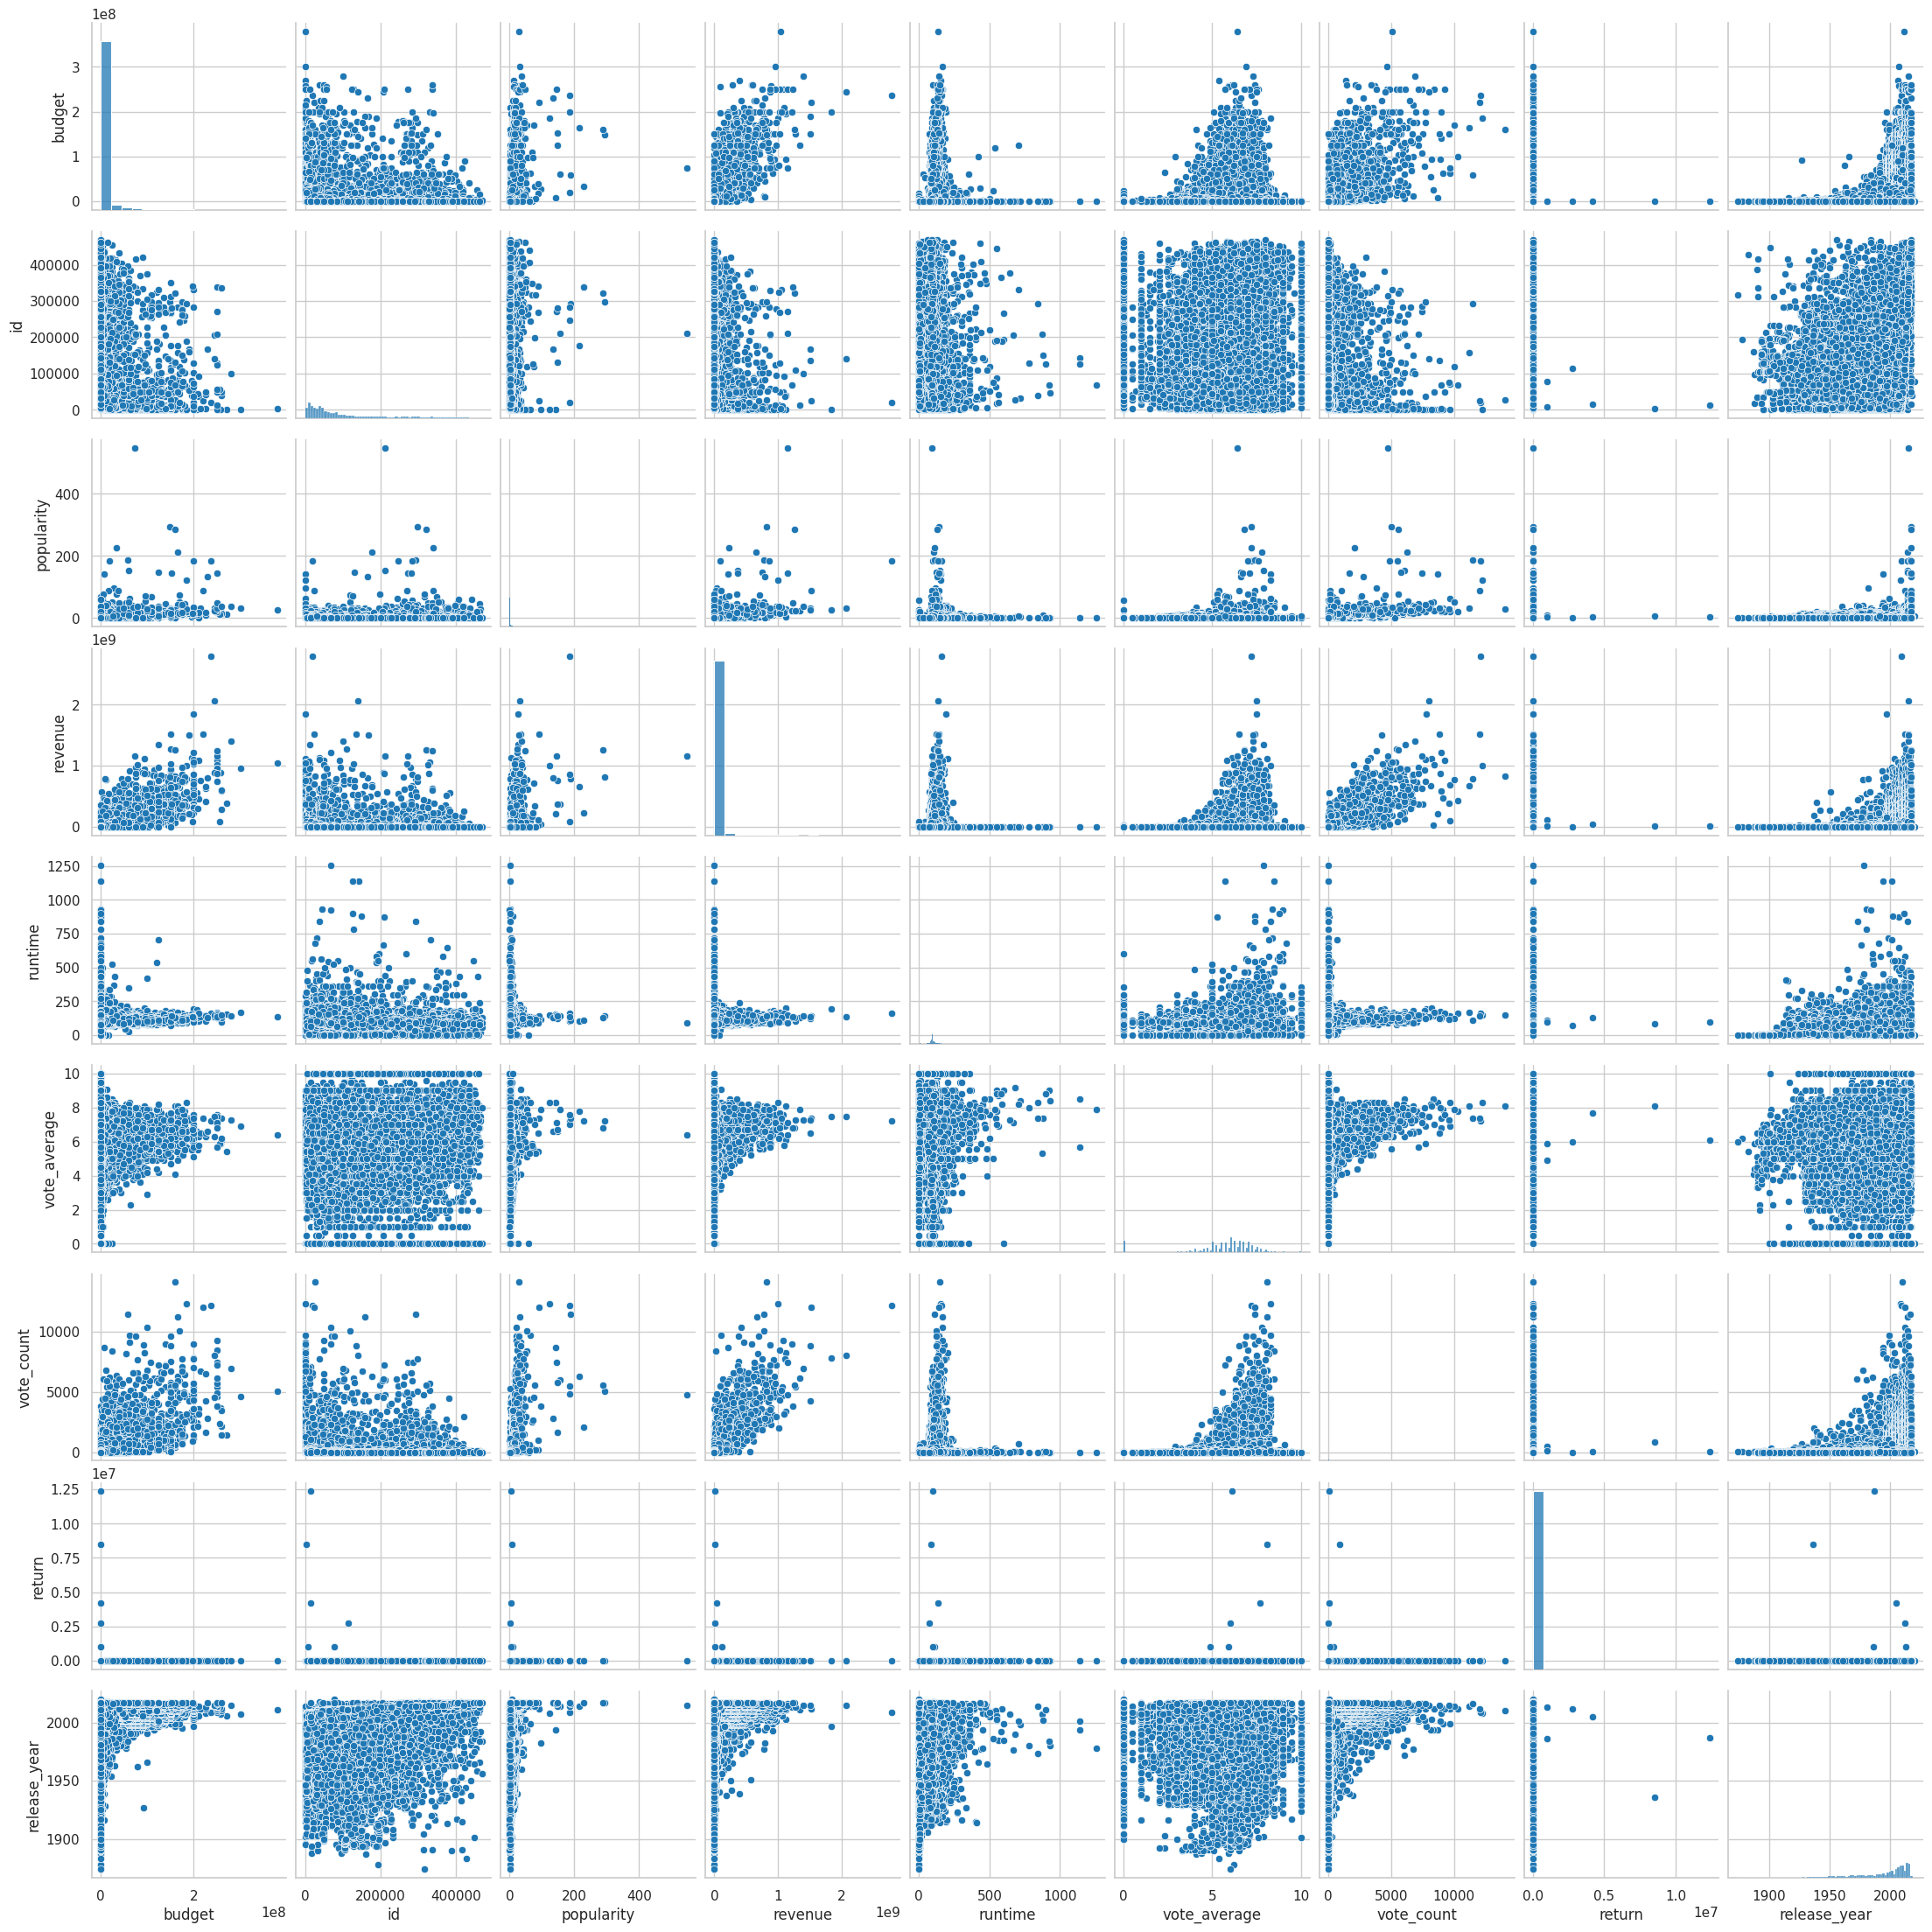

In [51]:
sns.pairplot(
    data=movies
    )

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=01743208-f339-48d2-82a4-bdc6d181301e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>